## Assignment 04

In [1]:
### -------------------
### importing libraries
### -------------------

import urllib

from bs4 import BeautifulSoup   # importing beautiful soup library

from nltk.tokenize import word_tokenize

from nltk import pos_tag, FreqDist, RegexpParser

from nltk.stem import WordNetLemmatizer

from sumy.parsers.plaintext import PlaintextParser

from sumy.summarizers.text_rank import TextRankSummarizer

from sumy.nlp.tokenizers import Tokenizer

import transformers

### 1. Scrap the web and find top 10 nouns from the page

link : https://en.wikipedia.org/wiki/Saturn

In [2]:
# Sending a request to the url.

url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Saturn')

# Reading the data from the response object

data = url.read()

# Converting the byte code file into text

data = data.decode('utf-8')

print(len(data))

587871


In [3]:
# Parsin the webpage using Beautiful Soup

soup = BeautifulSoup(data, 'html.parser')

# Text data without html tags and without white spaces

text = soup.get_text()

print(len(text))

80727


In [4]:
# Tokenizing the words 

word_token = word_tokenize(text = text)

print(len(word_token))

15711


In [5]:
# tagging the words

tags = pos_tag(word_token)

print(len(tags))

15711


In [6]:
# Filtering all the nouns

word_nouns = [word for word, tag in tags if word.isalpha() and tag.startswith('N')]

print(len(word_nouns))

4702


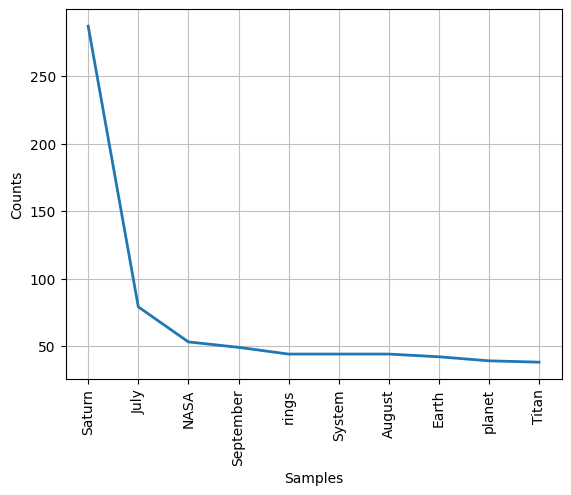

[('Saturn', 287), ('July', 79), ('NASA', 53)]


In [7]:
# Find and plotting the top 10 nouns 

freq = FreqDist(word_nouns)

freq.plot(10, cumulative = False)

print(freq.most_common(3))

### 2. Print all the unique verbs in their root form.

In [8]:
# Finding all the verbs 

word_verb = [word for word, tag in tags if word.isalpha() and tag.startswith('V')]

print(len(word_verb))

1108


In [9]:
# Intializing the lemmatizer

wn_lemmatizer = WordNetLemmatizer()

root_verb = {}


# Lemmatizing the word to their root form

for word in word_verb:
    
    root_verb[word] = wn_lemmatizer.lemmatize(word = word, pos = 'v')


# Printing unique verbs    

for verb, lemma in root_verb.items():
    
    print('Root form of verb ', verb, 'is', lemma)

Root form of verb  content is content
Root form of verb  sidebar is sidebar
Root form of verb  editCommunity is editCommunity
Root form of verb  are is be
Root form of verb  logged is log
Root form of verb  learn is learn
Root form of verb  move is move
Root form of verb  symbol is symbol
Root form of verb  satellites is satellite
Root form of verb  reading is read
Root form of verb  Toggle is Toggle
Root form of verb  rumagnòlEspañolEsperantoEstremeñuEuskaraفارسیFiji is rumagnòlEspañolEsperantoEstremeñuEuskaraفارسیFiji
Root form of verb  ayisyenKriyòl is ayisyenKriyòl
Root form of verb  srpskiSrpskohrvatski is srpskiSrpskohrvatski
Root form of verb  links is link
Root form of verb  sourceView is sourceView
Root form of verb  hereRelated is hereRelated
Root form of verb  shortened is shorten
Root form of verb  is is be
Root form of verb  see is see
Root form of verb  numbering is number
Root form of verb  approaching is approach
Root form of verb  photographed is photograph
Root form o

### 3. Extract all the <[DT]><[JJ]><[NN]> phrases from the article

In [10]:
# Creating the object of the regexparser

chunker = RegexpParser("""
P : {<DT><JJ><NN>}
""")

result = chunker.parse(tags)

result

### 4. Summarize the text using TextRank Algorithm

In [11]:
# Intinalizng the Plaintext Parser

my_parser=PlaintextParser.from_string(text,Tokenizer('english'))

# Initializing the TextRank Summarizer

text_rank_summarizer = TextRankSummarizer()

summary = text_rank_summarizer(my_parser.document, sentences_count = 3)

In [12]:
# printing summary

for sent in summary:
    
    print(sent)
    
    print()

The combination of the bulge and rotation rate means that the effective surface gravity along the equator, 8.96 m/s2, is 74% of what it is at the poles and is lower than the surface gravity of Earth.

The Moon's orbit is inclined by several degrees relative to Saturn's, so occultations will only occur when Saturn is near one of the points in the sky where the two planes intersect (both the length of Saturn's year and the 18.6-Earth year nodal precession period of the Moon's orbit influence the periodicity).

(Audio help · More spoken articles) Saturn overview by NASA's Science Mission Directorate Saturn fact sheet at the NASA Space Science Data Coordinated Archive Saturnian System terminology by the IAU Gazetteer of Planetary Nomenclature Cassini-Huygens legacy website by the Jet Propulsion Laboratory Interactive 3D gravity simulation of the Cronian system Archived 17 August 2020 at the Wayback Machine vteSaturn Outline Geography Dragon Storm Great White Spot Hexagon Magnetosphere Ring

### 5. Summarize the text using extractive summarization

In [13]:
pipeline = transformers.pipeline('summarization')

2023-12-13 08:52:54.272185: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 08:52:55.057037: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 08:52:57.590996: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 08:53:06.417874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/ssh

In [14]:
summary_text = pipeline(text[3970:5000],
                         max_length = 200,
                         min_length = 5,
                         do_sample = False)[0]['summary_text']
                        
print(summary_text)

 This article is about the planet . For the deity, see Saturn (mythology) For other uses of the word "sætərn" see Saturn . The planet is the sixth planet from the Sun .
